In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn import svm

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("concat_2_dataset.csv")
df
df = df.drop(['Unnamed: 0'], axis=1)
#df


In [3]:
df

,Unnamed: 0.1,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_win,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_win,year_basho,...,basho,sumo_rank,heya,shusshin,birth_date,height,weight,prev_year,prev_win,prev_lose
0,0,4122.0,8.0,139.0,0.0,4131.0,7.0,246.0,1.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4131.0,7.0,246.0,1.0,4122.0,8.0,139.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1348.0,6.0,90.0,0.0,4124.0,5.0,199.0,1.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4124.0,5.0,199.0,1.0,1348.0,6.0,90.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1334.0,3.0,276.0,1.0,4118.0,4.0,7.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191076,174180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,462.0,11.0,22.0,4156.0,111.0,625.0,769.0,2.0,1.0
191077,174181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,463.0,16.0,55.0,4246.0,12.0,73.0,769.0,1.0,2.0
191078,174182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,464.0,56.0,26.0,2109.0,101.0,655.0,491.0,0.0,2.0
191079,174183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,465.0,25.0,36.0,3088.0,43.0,395.0,599.0,0.0,7.0


In [ ]:
"Unnamed: 0","rikishi1_id","rikishi1_rank","rikishi1_shikona","rikishi1_win","rikishi2_id","rikishi2_rank","rikishi2_shikona","rikishi2_win","year_basho","month_basho","day_basho","id""rank","rikishi","height_cm","weight_kg","prev_rank","prev_w","prev_l","basho","sumo_rank","heya","shusshin","birth_date","height","weight","prev_year","prev_win","prev_lose"


In [4]:
df.to_csv("testpbi.csv")

In [104]:

X = df.drop(["rikishi2_win"], axis=1)
# X is the dataframe without the target 

y = df.rikishi2_win

In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20, random_state=42 )#stratify=y

In [106]:
preprocessing_sm = SMOTE(sampling_strategy='auto')
gbc = GradientBoostingClassifier()
preprocessing_ss = StandardScaler()
pca = PCA()
preprocessing_mms = MinMaxScaler()
model = linear_model.LogisticRegression()
model_rfc = DecisionTreeClassifier()


dict_keys(['memory', 'steps', 'verbose', 'standard scaler', 'pca', 'smote', 'LogisticRegression', 'standard scaler__copy', 'standard scaler__with_mean', 'standard scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'LogisticRegression__ccp_alpha', 'LogisticRegression__class_weight', 'LogisticRegression__criterion', 'LogisticRegression__max_depth', 'LogisticRegression__max_features', 'LogisticRegression__max_leaf_nodes', 'LogisticRegression__min_impurity_decrease', 'LogisticRegression__min_samples_leaf', 'LogisticRegression__min_samples_split', 'LogisticRegression__min_weight_fraction_leaf', 'LogisticRegression__random_state', 'LogisticRegression__splitter'])
[0. 0. 0. ... 1. 0. 0.]


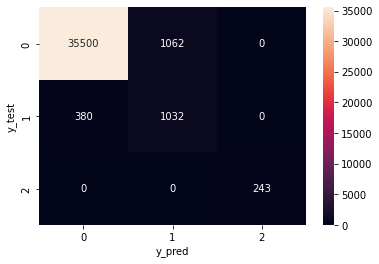

accuracy train : 1.000
accuracy test : 0.962
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     36562
         1.0       0.49      0.73      0.59      1412
    125368.0       1.00      1.00      1.00       243

    accuracy                           0.96     38217
   macro avg       0.83      0.90      0.86     38217
weighted avg       0.97      0.96      0.97     38217



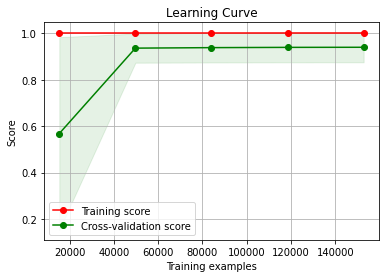

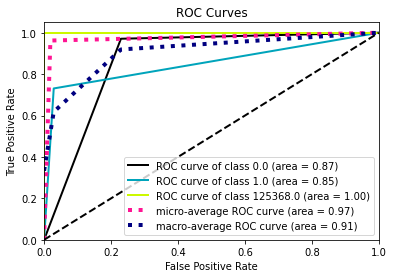

In [107]:
def pipeline_logistic_regression_standard_scaler():
    pipeline_log = imbpipeline(steps=[
                                      ['standard scaler' , preprocessing_ss],
                                      ['pca' , pca],
                                      ['smote' , preprocessing_sm] , 
                                   ['LogisticRegression', model_rfc]
                                   ])
    pipeline_log.fit(X_train, y_train.values)
    print(pipeline_log.get_params().keys())

    y_pred_log = pipeline_log.predict(X_test)
    print(y_pred_log)

    cm = confusion_matrix(y_test, y_pred_log)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

    print("accuracy train : %.3f" % pipeline_log.score(X_train, y_train))
    print("accuracy test : %.3f" % pipeline_log.score(X_test, y_test))

    plot_learning_curve(pipeline_log, X, y)

    print(classification_report(y_test, y_pred_log))

    y_probas = pipeline_log.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)

    X_test['proba_ml'] = pipeline_log.score(X_train, y_train)
    
    with open('model_pkl.pickle', 'wb') as files:
        pickle.dump(pipeline_log, files)
    #X_test['predict'] = pred
    # X_test
    

pipeline_logistic_regression_standard_scaler()


In [108]:
X_test = X_test.drop(['rikishi1_shikona'] , axis=1)
X_test

,Unnamed: 0.1,rikishi1_id,rikishi1_rank,rikishi1_win,rikishi2_id,rikishi2_rank,rikishi2_shikona,year_basho,month_basho,day_basho,...,sumo_rank,heya,shusshin,birth_date,height,weight,prev_year,prev_win,prev_lose,proba_ml
46677,29781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93.0,8.0,43.0,609.0,130.0,216.0,949.0,2.0,5.0,1.0
154586,137690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,302.0,25.0,71.0,2564.0,135.0,725.0,423.0,5.0,2.0,1.0
22540,5644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,287.0,53.0,48.0,171.0,91.0,266.0,249.0,2.0,5.0,1.0
32041,15145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,455.0,28.0,1.0,1018.0,52.0,405.0,597.0,3.0,4.0,1.0
102483,85587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,736.0,19.0,63.0,1196.0,149.0,595.0,823.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93970,77074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,906.0,40.0,8.0,1797.0,232.0,565.0,941.0,4.0,3.0,1.0
105579,88683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,976.0,21.0,58.0,2223.0,48.0,515.0,935.0,2.0,5.0,1.0
6881,6881,1018.0,30.0,0.0,865.0,7.0,103.0,1970.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30477,13581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113.0,8.0,22.0,940.0,179.0,335.0,509.0,5.0,2.0,1.0


In [109]:
def feature_importance_dtc():
    importances = model_dtc.coef_[0]
#
# Sort the feature importance in descending order
#
    sorted_indices = np.argsort(importances)[::-1]
    
 
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()
feature_importance_dtc()

NameError: name 'model_dtc' is not defined

: 

In [ ]:
rikishi_name = "Hakuho"
rikishi_name

In [ ]:
df.to_csv('result.csv')

In [ ]:
pd.read_pickle('model_pkl.pickle')

In [ ]:
df_19_features = df.drop(['rikishi1_win'] , axis=1)
df_19_features.to_csv('18_features_df.csv')

In [ ]:
pd.read_csv('18_features_df.csv')